## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 10$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [2]:
data = DataPreparation()

In [3]:
size_df = 1000
noise = 'high'
data.sample_params_from_prior(size_df, 42)

In [4]:
if noise == 'low':
    sigma = 1
if noise == 'medium':
    sigma = 5
if noise == 'high':
    sigma = 10
if noise == 'vhigh':
    sigma = 100

In [5]:
data.simulate_data(data.params,
                   sigma, 
                   simulation_name = 'linear_homoskedastic',
                   inject_type = 'feature'
                    )

linear_homoskedastic simulation data generated,                 with noise injected type feature.


Let's take a look at this simulated dataset.

In [6]:
print(np.shape(data.output[0]))
data.output

torch.Size([101])


tensor([[ 9.0143e+00,  1.2760e+01,  1.6505e+01,  ...,  3.7606e+02,
          3.7981e+02,  3.8355e+02],
        [ 1.9732e+00,  9.2931e+00,  1.6613e+01,  ...,  7.1933e+02,
          7.2665e+02,  7.3397e+02],
        [-6.8801e+00, -5.3199e+00, -3.7597e+00,  ...,  1.4602e+02,
          1.4758e+02,  1.4914e+02],
        ...,
        [ 3.1391e+00,  1.0653e+01,  1.8167e+01,  ...,  7.3949e+02,
          7.4700e+02,  7.5451e+02],
        [-8.6208e+00,  9.4531e-01,  1.0511e+01,  ...,  9.2886e+02,
          9.3843e+02,  9.4799e+02],
        [-4.3563e+00, -3.7857e+00, -3.2152e+00,  ...,  5.1557e+01,
          5.2128e+01,  5.2698e+01]])

In [7]:
data.params

array([[ 3.74540119,  9.01428613],
       [ 7.31993942,  1.97316968],
       [ 1.5601864 , -6.88010959],
       ...,
       [ 7.51375086,  3.13910313],
       [ 9.56614621, -8.62083967],
       [ 0.57054721, -4.35625851]])

ValueError: x and y must have same first dimension, but have shapes (1000, 101) and torch.Size([101])

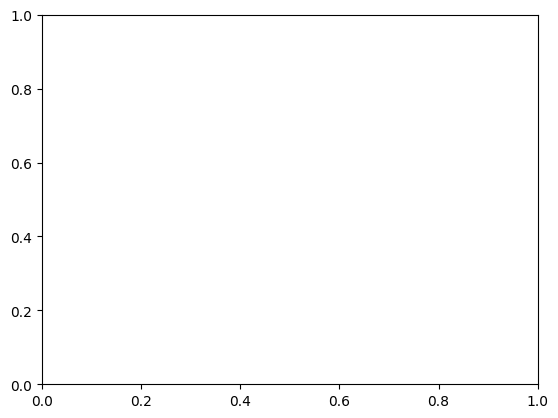

In [8]:
plt.clf()
for i in range(5):
    plt.plot(data.input, data.output[i])
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
plt.legend()
plt.show()
    

In [ ]:
# now make it into a dataframe
dict = data.get_dict()
dict

## Save the data to h5

In [ ]:
saver = MyDataLoader()

In [ ]:
# save the dataframe
filepath = '../data/'
saver.save_data_h5('linear_homoskedastic_sigma_'+str(sigma)+'_size_'+str(size_df), dict)

## Repeat the above but now for linear heterogeneous data

In [ ]:
data.simulate_data(data.params,
                   sigma, 
                   'linear_heteroskedastic'
                    )

In [ ]:
plt.clf()
for i in range(5):
    plt.plot(data.input, data.output[i])
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
plt.legend()
plt.show()

In [ ]:
dict_ht = data.get_dict()
saver = MyDataLoader()
filepath = '../data/'
saver.save_data_h5('linear_heteroskedastic_sigma_'+str(sigma)+'_size_'+str(size_df), dict_ht)